## Clustering

How the K-means algorithm works with a sample dataset of delivery fleet driver data.<br>
For the sake of simplicity, we'll only be looking at two driver features:
- mean distance driven per day
- the mean percentage of time a driver was >5 mph over the speed limit.

In general, this algorithm can be used for any number of features, so long as the number of data samples is much greater than the number of features.

### Step 1: Clean and Transform Your Data

For this example, the data is already cleaned. A sample of the data as a pandas DataFrame is shown below.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("delivery-fleet_data.tsv", delimiter="\t")
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [3]:
df.shape

(4000, 3)

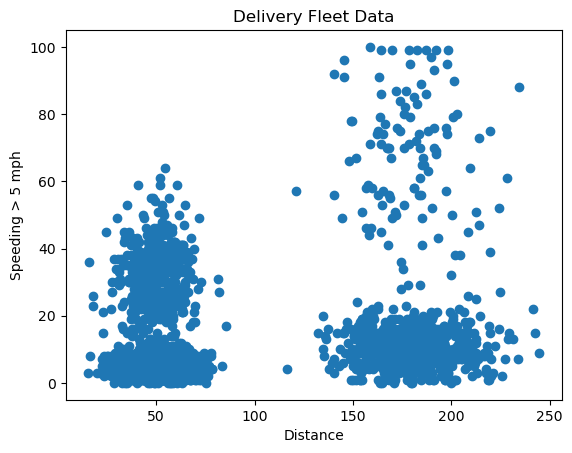

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df.Distance_Feature,df.Speeding_Feature)
plt.title("Delivery Fleet Data")
plt.xlabel("Distance")
plt.ylabel("Speeding > 5 mph")
plt.savefig("drivers.png")
plt.show()

### Step 2: Choose K and Run the Algorithm

Start by choosing K=2.

In [5]:
from sklearn.cluster import KMeans
data = df.drop(columns=['Driver_ID'])

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [7]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [9]:
centroids = kmeans.cluster_centers_

### Step 3: Review the Results

The chart below shows the results. Visually, you can see that the K-means algorithm splits the two groups based on the distance feature. Each cluster centroid is marked with a star.

- Group 1 Centroid = (50, 8.8)
- Group 2 Centroid = (180, 18.3)
Using domain knowledge of the dataset, we can infer that Group 1 is urban drivers and Group 2 is rural drivers.

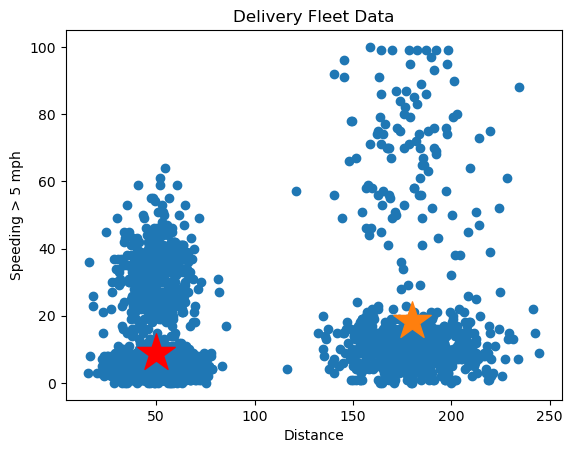

In [10]:
plt.scatter(df.Distance_Feature,df.Speeding_Feature)
plt.scatter(centroids[0][0], centroids[0][1], marker='*', s=800, c='r')
plt.scatter(centroids[1][0], centroids[1][1], marker='*', s=800)
plt.title("Delivery Fleet Data")
plt.xlabel("Distance")
plt.ylabel("Speeding > 5 mph")
plt.show()

### Step 4: Iterate Over Several Values of K
Test how the results look for $ K=4 $. To do this, all you need to change is the target number of clusters in the `KMeans()` function.

In [11]:
kmeans = KMeans(n_clusters=4).fit(data)

In [12]:
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 1])

In [13]:
kmeans.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [14]:
centroids_1 = kmeans.cluster_centers_

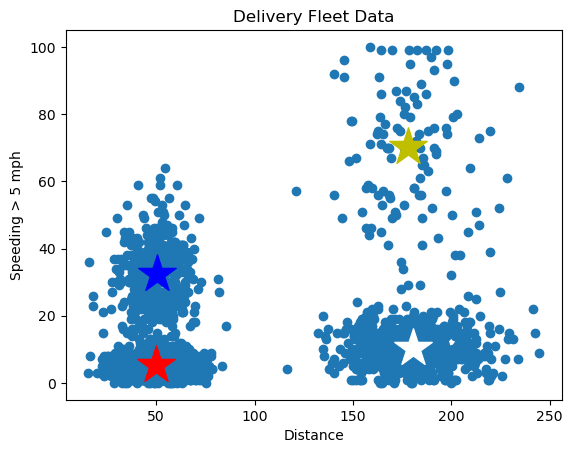

In [15]:
plt.scatter(df.Distance_Feature,df.Speeding_Feature)
plt.scatter(centroids_1[0][0], centroids_1[0][1], marker='*', s=800,c='r')
plt.scatter(centroids_1[1][0], centroids_1[1][1], marker='*', s=800,c='w')
plt.scatter(centroids_1[2][0], centroids_1[2][1], marker='*', s=800,c='y')
plt.scatter(centroids_1[3][0], centroids_1[3][1], marker='*', s=800,c='b')
plt.title("Delivery Fleet Data")
plt.xlabel("Distance")
plt.ylabel("Speeding > 5 mph")
plt.show()

The chart above shows the resulting clusters.

We see that four distinct groups have been identified by the algorithm; now speeding drivers have been separated from those who follow speed limits, in addition to the rural vs. urban divide.

The threshold for speeding is lower with the urban driver group than for the rural drivers, likely due to urban drivers spending more time in intersections and stop-and-go traffic.

In [16]:
kmeans.predict(data)

array([3, 3, 3, ..., 1, 1, 1])

In [17]:
data['cluster_no'] = kmeans.predict(data)

In [18]:
data.head()

,Distance_Feature,Speeding_Feature,cluster_no
0,71.24,28.0,3
1,52.53,25.0,3
2,64.54,27.0,3
3,55.69,22.0,3
4,54.58,25.0,3


In [19]:
data.cluster_no.value_counts()

cluster_no
0    2773
1     696
3     427
2     104
Name: count, dtype: int64

In [20]:
data.head()

,Distance_Feature,Speeding_Feature,cluster_no
0,71.24,28.0,3
1,52.53,25.0,3
2,64.54,27.0,3
3,55.69,22.0,3
4,54.58,25.0,3
